In [1]:
import sys
import os

# append to path root dir
sys.path.append('../')

In [6]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import dataset
import importlib

In [14]:
import dataset
importlib.reload(dataset)

<module 'dataset' from 'g:\\Dev\\AI\\Projects\\ImageGeneration\\dataset.py'>

In [15]:
dataset = dataset.AudiAutoregression24px()
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

In [325]:
bruv = dataset[0][0].view(3, 16, 16)
bruv = bruv.permute(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


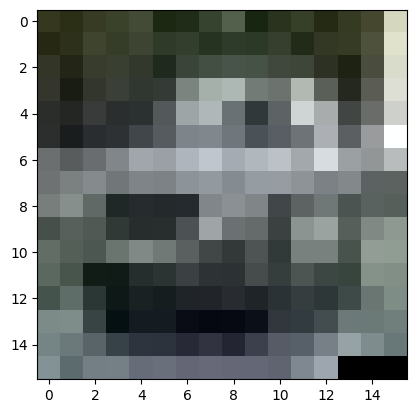

In [326]:
plt.imshow(bruv.numpy())

In [310]:
dataset[0][0][:256]

tensor([ 0.2078,  0.1686,  0.2157,  0.2275,  0.2627,  0.1098,  0.1255,  0.2118,
         0.3255,  0.0941,  0.1647,  0.2118,  0.1451,  0.2078,  0.2706,  0.8353,
         0.1490,  0.1765,  0.2471,  0.2078,  0.2392,  0.1843,  0.2000,  0.1490,
         0.1804,  0.1725,  0.2118,  0.1333,  0.2000,  0.2118,  0.3059,  0.8784,
         0.2000,  0.1373,  0.2196,  0.2235,  0.1961,  0.1216,  0.2275,  0.2627,
         0.2824,  0.2745,  0.2510,  0.2431,  0.1765,  0.1176,  0.2902,  0.8510,
        -1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.00

In [9]:
class Generator(nn.Module):
    def __init__(self, hidden_neurons):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(3*24*24, hidden_neurons),
            nn.ReLU(),
            nn.Linear(hidden_neurons, hidden_neurons),
            nn.ReLU(),
            nn.Linear(hidden_neurons, hidden_neurons),
            nn.ReLU(),
            nn.Linear(hidden_neurons, hidden_neurons),
            nn.ReLU(),
            nn.Linear(hidden_neurons, 3),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [10]:
DEVICE = 'cuda'

In [11]:
nnet = Generator(512).to(DEVICE)
criterion = nn.MSELoss().to(DEVICE)
optimizer = torch.optim.Adam(nnet.parameters())

In [613]:
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.0001)

In [12]:
losses = []

In [16]:
for epoch in range(10000):
    for i, batch in enumerate(dataloader):
        output = nnet(batch[0].to(DEVICE))
        target = batch[1].to(DEVICE)

        loss = criterion(output.squeeze(), target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        if len(losses) > 100:
            losses.pop(0)
        
        avg_loss = sum(losses) / len(losses)

        print(epoch, loss.item(), avg_loss, end="\r")

KeyboardInterrupt: 

In [17]:
nnet = nnet.to("cpu")

In [27]:
# generate an image
image = torch.zeros((3, 24*24))

image[0] = 0
image[1] = 0
image[2] = 0


index = 1
initial_index = index

In [28]:
import time

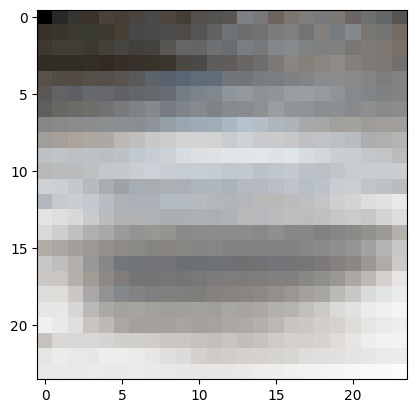

In [29]:
for i in range(24*24 - initial_index):
    image[0][index] = -1.0
    image[1][index] = -1.0
    image[2][index] = -1.0

    output = nnet(torch.flatten(image))

    image[0][index] = output[0]
    image[1][index] = output[1]
    image[2][index] = output[2]

    index += 1

    flattened = torch.flatten(image)
    bruv = flattened.view(3, 24, 24)
    bruv = bruv.permute(1, 2, 0)
    print(i, end="\r")
plt.imshow(bruv.detach().numpy())


In [618]:
image

tensor([[0.5902, 0.5875, 0.5739, 0.5679, 0.5676, 0.5594, 0.5466, 0.5281, 0.5047,
         0.5097, 0.4920, 0.4769, 0.4772, 0.4900, 0.4794, 0.4604, 0.5770, 0.5673,
         0.5682, 0.5651, 0.5473, 0.5373, 0.5122, 0.4966, 0.4971, 0.4813, 0.4835,
         0.4602, 0.4384, 0.4839, 0.4657, 0.4226, 0.5071, 0.5324, 0.5219, 0.5197,
         0.4970, 0.4847, 0.4747, 0.4827, 0.4404, 0.3971, 0.4319, 0.4308, 0.4227,
         0.4172, 0.4128, 0.3770, 0.4850, 0.4661, 0.4700, 0.4745, 0.4427, 0.4030,
         0.4016, 0.4262, 0.3763, 0.3756, 0.3804, 0.3887, 0.3872, 0.3759, 0.3706,
         0.3646, 0.4855, 0.4799, 0.4594, 0.4552, 0.4426, 0.4049, 0.3558, 0.3582,
         0.3474, 0.3488, 0.3535, 0.3591, 0.3903, 0.3700, 0.3661, 0.3422, 0.4326,
         0.4036, 0.4214, 0.4182, 0.4639, 0.4478, 0.3656, 0.3600, 0.3763, 0.3635,
         0.3796, 0.3939, 0.4336, 0.4009, 0.3620, 0.3166, 0.4165, 0.4141, 0.4522,
         0.4256, 0.4764, 0.4538, 0.4750, 0.4182, 0.3881, 0.3678, 0.3744, 0.4153,
         0.4046, 0.4018, 0.3